# Working with Scientific Datasets

<img src="images/000_000_epom_logo.png" alt="ePOM" title="" align="center" width="12%" alt="Python logo\"></a>

Based on one of the example topics listed below (and discussions in GGE5011/GGE6302), you will design and implement a Python Jupyter Notebook practical exercise. The exercise should be modelled to fit into
the EPOM Ocean Data Science Notebook.

**Requirements**
- Follows the format described in Python Basics / 000_Welcome_on_Board
- Include an introduction to the problem or topic with relevant links to other websites, references or resources.
- Ensure that the notebook is structured with natural progression through the topic
	- Introduction, basic information, advanced information, conclusion
- The material should go above and beyond the material covered in the Ocean Data Science
notebooks
- Include sample code and solutions separated by cells.
	- All code should run without errors or warnings.
- Text should be formatted using markup language with headings, images, and links
- Post a message in Teams within the “GGE6302 Practical Exercise” channel with the topic you will be developing.

**Note:**
If you are building the notebook on Jupyter.omg.unb.ca, please inform ian.church@unb.ca if you require any additional Python libraries.

**Deliverables**
- The juypter notebook file (*.ipynb)
- The completed notebook exercise with solutions in PDF format
Feel free to select a topic not included on this list or modify one of the topics below.
- Read and display Oceanographic Data from a NetCDF files
	- Access datasets via OPeNDAP
	- Using xarray to interface with NetCDF files

---

The purpose of this notebook is to demonstrate the use of a few related standards and libraries related to working with oceanographic datasets. This involves:
- Using OPeNDAP to access online datasets directly through code
- The NetCDF file format
- Using xarray, what distinguishes it from NumPy, and how to use it with our chosen dataset

Before you start this notebook, you should make sure you have completed the numpy notebooks.

First, import some modules we will need later.

In [3]:
from pydap.client import open_url
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
#from erddapClient import ERDDAP_Server, ERDDAP_Tabledap
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Introduction to Xarray
Xarray is similar to numpy, but with more conveniences added. Most prominently, we can store metadata in our arrays, such as names for our array dimensions, and names for each index along each axis. We can directly use numpy arrays and features to do this.

Let's make an array (an Xarray `DataArray`) with two named dimensions


In [ ]:
my_map = xr.DataArray(
    #this doesn't work, it'll make a 2x10 matrix
    #[np.linspace(0,10,10),np.linspace(0,10,10)],	
    
    #setup the multidimensional array's data
    data=np.random.randn(5,5),
    #set the names of each dimension of our array
    dims=["latitude","longitude"],
    # give some names to different indices of our arrays, as we feel like it
    coords={
		"latitude":[0,10,25,30,400],
		"longitude":["apple",1,"banana","tomato","lettuce"],
	}, 
	name="my_map",
	attrs={
    "some":"metadata", # any metadata of your choice
    "units":"happiness", #what does the value at some coordinate represent? (used by xarray plots)
    "long_name":"Happiness by grid coordinate" #Title of your array (used by xarray)
  }
)
my_map.latitude.attrs["units"] = "degrees" #set metadata for our axis / coordinates
#my_map.longitude.attrs["units"] = "fruit"

my_map

<xarray.DataArray 'my_map' (latitude: 5, longitude: 5)> Size: 200B
array([[ 0.6643641 , -0.14164409, -1.23250409,  0.82854523, -1.71396444],
       [ 1.80740656,  2.03699591, -0.44107796, -0.80766455, -0.05805216],
       [ 0.10663656,  1.805395  ,  1.70863323, -0.57638283, -0.45843697],
       [ 1.24874017,  0.5532549 , -0.22526848,  1.78656997, -1.36342897],
       [-0.48661566, -0.29137001,  0.14508814, -1.75362723, -0.41600522]])
Coordinates:
  * latitude   (latitude) int64 40B 0 10 25 30 400
  * longitude  (longitude) <U21 420B 'apple' '1' 'banana' 'tomato' 'lettuce'
Attributes:
    some:       metadata
    units:      happiness
    long_name:  Happiness by grid coordinate

Let's try plotting this data set using Xarray.

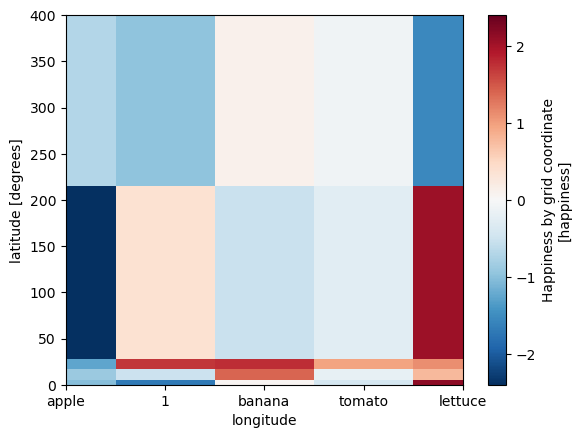

In [50]:
my_map.plot()

As you can see, xarray can plot our data using the metadata we gave it when we constructed the array. The latitude axis was scaled according to fit the numeric coordinate labels. There are a couple restrictions on the coordinates, namely:
- The number of coordinates must match the length of the corresponding dimension, or be omitted for that dimension
- To plot, numeric coordinates must be sorted (you will get an error if you try the sequence `5,50,10,20,30` as the coordinate labels for one of the axis above for example)

We can also select values or subarrays using the coordinate labels.

In [ ]:
#multiple value selection using coordinate labels
my_map.sel({"latitude":25, "longitude":"banana"})

<xarray.DataArray 'my_map' (latitude: 5)> Size: 40B
array([ 1.20366109, -1.1722734 , -0.30240739,  1.14186256, -1.1472151 ])
Coordinates:
  * latitude   (latitude) int64 40B 0 10 25 30 400
    longitude  <U21 84B 'banana'
Attributes:
    some:     metadata
    units:    happiness

In [34]:
#select by dimension name and index
my_map.isel(longitude=2)

<xarray.DataArray 'my_map' (latitude: 5)> Size: 40B
array([ 1.20366109, -1.1722734 , -0.30240739,  1.14186256, -1.1472151 ])
Coordinates:
  * latitude   (latitude) int64 40B 0 10 25 30 400
    longitude  <U21 84B 'banana'
Attributes:
    some:     metadata
    units:    happiness

Computation and selection should also work the same as Numpy, except that we can use dimension and coordinate names instead of indices if we like.

In [ ]:
my_map.where(my_map.latitude==25)

<xarray.DataArray 'my_map' (latitude: 5, longitude: 5)> Size: 200B
array([[        nan,         nan,         nan,         nan,         nan],
       [        nan,         nan,         nan,         nan,         nan],
       [ 1.98479831, -1.02261397, -0.43388179,  0.67907641,  0.3662095 ],
       [        nan,         nan,         nan,         nan,         nan],
       [        nan,         nan,         nan,         nan,         nan]])
Coordinates:
  * latitude   (latitude) int64 40B 0 10 25 30 400
  * longitude  (longitude) <U21 420B 'apple' '1' 'banana' 'tomato' 'lettuce'
Attributes:
    some:       metadata
    units:      happiness
    long_name:  Happiness by grid coordinate

In [ ]:
#take the median along the longitude axis, for each latitude
my_map.median("longitude")

<xarray.DataArray 'my_map' (latitude: 5)> Size: 40B
array([ 0.17634715,  0.29534095,  0.3662095 , -0.08507615,  0.17783524])
Coordinates:
  * latitude  (latitude) int64 40B 0 10 25 30 400

In addition to the `DataArray` class, Xarray provides the `Dataset` class, which is a dictionary of `DataArray`s. If we put multiple `DataArray`s with matching axis into a `Dataset`, then we can do plots and computations using these DataArrays together through the shared axis(s).

In [ ]:
my_dataset = xr.Dataset({
    "happiness":my_map,
    #"temperature":my_map*2
    #"temperature": {
    #    "dims":("latitude", "longitude", "abc"),
    #    "data":[]
    #},
})
#my_dataset.temperature.dims = ("latitude", "longitude", "abc")
#my_dataset.temperature["abc"] = [10,9,8,6,5,4,3,2,1]
my_dataset.attrs["some"] = "metadata"
#xr.Variable, xr.DataTree
my_dataset

<xarray.Dataset> Size: 660B
Dimensions:    (latitude: 5, longitude: 5)
Coordinates:
  * latitude   (latitude) int64 40B 0 10 25 30 400
  * longitude  (longitude) <U21 420B 'apple' '1' 'banana' 'tomato' 'lettuce'
Data variables:
    happiness  (latitude, longitude) float64 200B 0.6644 -0.1416 ... -0.416
Attributes:
    some:     metdata

# NetCDF

NetCDF is a file format...

<img align="left" width="6%" style="padding-right:10px;" src="images/key.png">

Key insight

<img align="left" width="6%" style="padding-right:10px;" src="images/info.png">

Supplemental information
`code snipped` **Bold Text**

<img align="left" width="6%" style="padding-right:10px;" src="images/test.png">

A test sheet with a pencil indicates the beginning of an exercise.

NetCDF
- https://doi.pangaea.de/10.1594/PANGAEA.880029
- https://catalog-intaros.nersc.no/dataset/ctd-data-collected-with-r-v-hakon-mosby
- https://data.gov.au/data/dataset/rv-investigator-voyage-in2017_t02-ctd-data
- https://www.ncei.noaa.gov/access/metadata/landing-page/bin/iso?id=gov.noaa.nodc:DFO-Profile
- https://www.marine.csiro.au/data/trawler/download.cfm?file_id=3685

TABLEDAP
- https://catalogue.ogsl.ca/en/dataset/ca-cioos_f1521dd5-d3a6-49cc-912f-b2b50cc0d41b
- https://erddap.ogsl.ca/erddap/files/mpoPmzaVikingCtdBinned/azmp-esg/2024/07/
- https://erddap.ogsl.ca/erddap/tabledap/mpoPmzaVikingCtdBinned.html

In [ ]:
viking = xr.open_dataset("https://opendap1.nodc.no/thredds/dodsC/physics/point/yearly/58AA_CTD_2002.nc")
viking

<xarray.Dataset> Size: 8MB
Dimensions:      (TIME: 54, POSITION: 54, DEPTH: 3433, LATITUDE: 54,
                  LONGITUDE: 54)
Coordinates:
  * TIME         (TIME) datetime64[ns] 432B 2002-03-07T00:27:19 ... 2002-11-0...
  * LATITUDE     (LATITUDE) float32 216B 62.36 62.49 62.6 ... 68.58 68.51 68.43
  * LONGITUDE    (LONGITUDE) float32 216B 5.201 4.946 4.693 ... 13.79 14.02
Dimensions without coordinates: POSITION, DEPTH
Data variables:
    TIME_QC      (TIME) float32 216B ...
    POSITION_QC  (POSITION) float32 216B ...
    DIRECTION    object 8B ...
    PRES         (TIME, DEPTH) float32 742kB ...
    PRES_QC      (TIME, DEPTH) float32 742kB ...
    TEMP         (TIME, DEPTH) float64 1MB ...
    PSAL         (TIME, DEPTH) float64 1MB ...
    CNDC         (TIME, DEPTH) float64 1MB ...
    TEMP_QC      (TIME, DEPTH) float32 742kB ...
    PSAL_QC      (TIME, DEPTH) float32 742kB ...
    CNDC_QC      (TIME, DEPTH) float32 742kB ...
Attributes: (12/54)
    _NCProperties:                  version=1|netcdflibversion=4.4.1|hdf5libv...
    title:                          Arctic Ocean - In Situ Observation Copern...
    qc_manual:                      Recommendations for in-situ data Near Rea...
    contact:                        cmems-service@imr.no
    format_version:                 1.4
    distribution_statement:         These data follow Copernicus standards; t...
    ...                             ...
    geospatial_lon_max:             22.333
    last_longitude_observation:     14.017
    geospatial_vertical_min:        0.000
    geospatial_vertical_max:        3434.000
    DODS.strlen:                    54
    DODS.dimName:                   TIME

In [5]:

#url = "http://test.opendap.org:8080/opendap/tutorials/20220531090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc"
#url = "http://www.jason.oceanobs.com/html/presentation/aviso_uk.html"
#url = "https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2/sst.mnmean.nc."
url = "https://www.smartatlantic.ca/erddap/tabledap/SMA_saint_john"
url2 = "https://dap.oceannetworks.ca/erddap/tabledap/allDatasets"
pydap_ds = open_url(url)#, protocol='dap4')

c:\Users\pkenned5\.conda\envs\gge6302_exercise\Lib\site-packages\pydap\handlers\dap.py:143: UserWarning: PyDAP was unable to determine the DAP protocol defaulting to DAP2. DAP2 is consider legacy and may result in slower responses. 
Consider replacing `http` in your `url` with either `dap2` or `dap4` to specify the DAP protocol (e.g. `dap2://<data_url>` or `dap4://<data_url>`).  For more 
information, go to https://www.opendap.org/faq-page.
  warnings.warn(


In [6]:
pydap_ds.tree()

.s
└──s
   ├──station_name
   ├──time
   ├──longitude
   ├──latitude
   ├──precise_lon
   ├──precise_lat
   ├──wind_spd_avg
   ├──wind_spd_max
   ├──wind_dir_avg
   ├──air_temp_avg
   ├──air_pressure_avg
   ├──surface_temp_avg
   ├──wave_ht_max
   ├──wave_ht_sig
   ├──wave_dir_avg
   ├──wave_spread_avg
   ├──wave_period_max
   ├──curr_spd_avg
   ├──curr_dir_avg
   ├──curr_spd2_avg
   ├──curr_dir2_avg
   ├──curr_spd3_avg
   ├──curr_dir3_avg
   ├──curr_spd4_avg
   ├──curr_dir4_avg
   ├──curr_spd5_avg
   ├──curr_dir5_avg
   ├──curr_spd6_avg
   ├──curr_dir6_avg
   ├──curr_spd7_avg
   ├──curr_dir7_avg
   ├──curr_spd8_avg
   ├──curr_dir8_avg
   ├──curr_spd9_avg
   ├──curr_dir9_avg
   ├──curr_spd10_avg
   ├──curr_dir10_avg
   ├──curr_spd11_avg
   ├──curr_dir11_avg
   ├──curr_spd12_avg
   ├──curr_dir12_avg
   ├──curr_spd13_avg
   ├──curr_dir13_avg
   ├──curr_spd14_avg
   ├──curr_dir14_avg
   ├──curr_spd15_avg
   ├──curr_dir15_avg
   ├──curr_spd16_avg
   ├──curr_dir16_avg
   ├──curr_spd17_avg
 

In [7]:
pydap_ds['s']['curr_spd_avg'].attributes

{'actual_range': [1, 4633],
 'ioos_category': 'Currents',
 'long_name': 'Curr Spd Avg',
 'standard_name': 'sea_water_speed',
 'units': 'mm s-1'}

In [8]:
a = pydap_ds['s']['curr_spd_avg']
#a.dims
#a.shape
#a.units
a.actual_range
arr = a[1:10]
print(arr)
#print(arr.array[:])
print(arr.iterdata())
#for i in arr.iterdata():
#    print(i)
print(a.dtype)
#print(a.size)
#print(a.path)
#print(a.data)
#l = list(a.data)
for i in a.data:
    print(i)
#print(l)
#s = np.rec.fromrecords(list(a.data), names=a.keys())

<BaseType with data SequenceProxy('https://www.smartatlantic.ca/erddap/tabledap/SMA_saint_john', <BaseType with data BaseProxy('https://www.smartatlantic.ca/erddap/tabledap/SMA_saint_john', 's.curr_spd_avg', dtype('>i2'), (), ())>, [], (slice(1, 10, 1),))>
<generator object BaseType.__iter__ at 0x000001FEB428C4A0>
>i2
0


In [9]:
ds = open_url(url2)
ds.tree()
ds['s']['minTime']

.s
└──s
   ├──datasetID
   ├──accessible
   ├──institution
   ├──dataStructure
   ├──cdm_data_type
   ├──class
   ├──title
   ├──minLongitude
   ├──maxLongitude
   ├──longitudeSpacing
   ├──minLatitude
   ├──maxLatitude
   ├──latitudeSpacing
   ├──minAltitude
   ├──maxAltitude
   ├──minTime
   ├──maxTime
   ├──timeSpacing
   ├──griddap
   ├──subset
   ├──tabledap
   ├──MakeAGraph
   ├──sos
   ├──wcs
   ├──wms
   ├──files
   ├──fgdc
   ├──iso19115
   ├──metadata
   ├──sourceUrl
   ├──infoUrl
   ├──rss
   ├──email
   ├──testOutOfDate
   ├──outOfDate
   └──summary


<BaseType with data SequenceProxy('https://dap.oceannetworks.ca/erddap/tabledap/allDatasets', <BaseType with data BaseProxy('https://dap.oceannetworks.ca/erddap/tabledap/allDatasets', 's.minTime', dtype('>f8'), (), ())>, [], (slice(None, None, None),))>

In [10]:
erddap = ERDDAP_Server("https://www.smartatlantic.ca/erddap")
print(erddap)

NameError: name 'ERDDAP_Server' is not defined

In [ ]:
search = erddap.search(searchFor="current")
print(search)

<erddapClient.ERDDAP_SearchResults>
Results:  71
[
  0 - <erddapClient.ERDDAP_Tabledap> SMA_saint_john , "Saint John Buoy"
  1 - <erddapClient.ERDDAP_Tabledap> eccc_opp_atlantic , "MSC Datamart realtime moored buoy data"
  2 - <erddapClient.ERDDAP_Tabledap> eccc_opp_44490_west_bay_of_fundy , "ECCC OPP, 44490, West Bay of Fundy"
  3 - <erddapClient.ERDDAP_Tabledap> eccc_opp_44488_east_chedabucto_bay , "ECCC OPP, 44488, East Chedabucto Bay"
  4 - <erddapClient.ERDDAP_Tabledap> eccc_opp_44489_west_chedabucto_bay , "ECCC OPP, 44489, West Chedabucto Bay"
  5 - <erddapClient.ERDDAP_Tabledap> cna_werc_sustained_wind_2-min_avg , "2-Minute Sustained Wind Data, Lord's Cove"
  6 - <erddapClient.ERDDAP_Tabledap> uvic_onc_mun_mi_conception_bay_fluorometer , "Conception Bay Fluorometer Deployed 2021-02-14 | Conception Bay Fluorimètre déployé 2021-02-14"
  7 - <erddapClient.ERDDAP_Tabledap> SMA_halifax_anemometer1 , "Halifax Ocean Terminals: Pier 31"
  8 - <erddapClient.ERDDAP_Tabledap> SMA_saint_joh

In [ ]:
table = ERDDAP_Tabledap("https://www.smartatlantic.ca/erddap", "SMA_saint_john")
#table.setResultVariables(['station_name','wind_spd_avg','wind_spd_max'])
table.addConstraint('time>=2025-10-13T00:00:00Z')
tabledap_res = xr.open_dataset(table.getData('nc'))
print(tabledap_res)
print("=========")
print(tabledap_res.keys())


<xarray.Dataset> Size: 99kB
Dimensions:           (row: 569)
Dimensions without coordinates: row
Data variables: (12/58)
    station_name      (row) object 5kB ...
    time              (row) datetime64[ns] 5kB ...
    longitude         (row) float64 5kB ...
    latitude          (row) float64 5kB ...
    precise_lon       (row) float64 5kB ...
    precise_lat       (row) float64 5kB ...
    ...                ...
    curr_dir18_avg    (row) int16 1kB ...
    curr_spd19_avg    (row) int16 1kB ...
    curr_dir19_avg    (row) int16 1kB ...
    curr_spd20_avg    (row) int16 1kB ...
    curr_dir20_avg    (row) int16 1kB ...
    wind_chill        (row) float32 2kB ...
Attributes: (12/43)
    adcp_bin_size:             1m
    adcp_blanking_distance:    1m
    adcp_head_depth:           1m
    cdm_data_type:             TimeSeries
    cdm_timeseries_variables:  station_name,longitude,latitude
    Conventions:               COARDS, CF-1.6, ACDD-1.3
    ...                        ...
    time_c

In [ ]:
res2 = xr.open_dataset("https://www.smartatlantic.ca/erddap/tabledap/SMA_saint_john")
print(res2)
print(res2['s.time'])
print(res2['s.surface_temp_avg'])

<xarray.Dataset> Size: 30MB
Dimensions:             (s: 172645)
Dimensions without coordinates: s
Data variables: (12/58)
    s.station_name      (s) object 1MB ...
    s.time              (s) datetime64[ns] 1MB ...
    s.longitude         (s) float64 1MB ...
    s.latitude          (s) float64 1MB ...
    s.precise_lon       (s) float64 1MB ...
    s.precise_lat       (s) float64 1MB ...
    ...                  ...
    s.curr_dir18_avg    (s) int16 345kB ...
    s.curr_spd19_avg    (s) int16 345kB ...
    s.curr_dir19_avg    (s) int16 345kB ...
    s.curr_spd20_avg    (s) int16 345kB ...
    s.curr_dir20_avg    (s) int16 345kB ...
    s.wind_chill        (s) float32 691kB ...
Attributes: (12/42)
    adcp_bin_size:             1m
    adcp_blanking_distance:    1m
    adcp_head_depth:           1m
    cdm_data_type:             TimeSeries
    cdm_timeseries_variables:  station_name,longitude,latitude
    Conventions:               COARDS, CF-1.6, ACDD-1.3
    ...                       

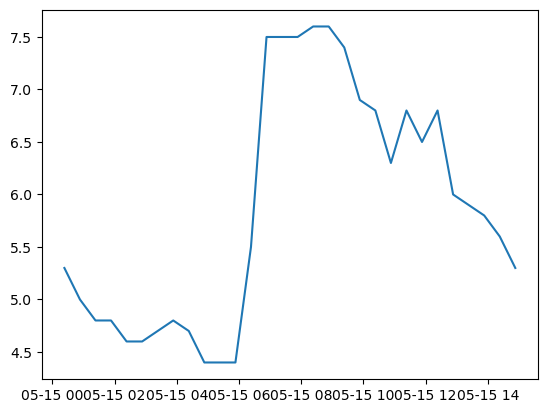

In [ ]:
#rows = res2
size = 30
plt.plot(res2['s.time'][0:size], res2['s.surface_temp_avg'][0:size])

ValueError: x must be one of None, 's'. Received 's.time' instead.

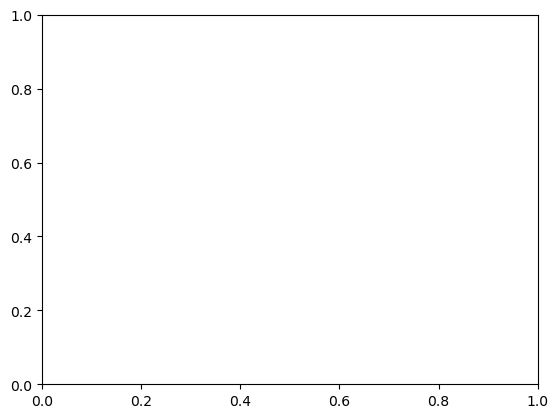

In [ ]:
air_p_plot = res2['s.air_pressure_avg'].plot.line(x="s.time")

 ## <image align="left" width="6%" style="padding-right:10px;" src="images/refs.png"> Useful References and Information


- https://pydap.github.io/pydap/en/5_minute_tutorial.html
- https://github.com/hmedrano/erddap-python
- https://docs.xarray.dev/en/stable/user-guide/io.html